In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
data1 = pd.read_csv('Add_sales_data_2018.csv')

In [265]:
data1.shape

(205, 7)

In [266]:
data1.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [267]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [268]:
data1.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [269]:
data1['Profit(in Thousands)'].nunique()

205

In [270]:
data1.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


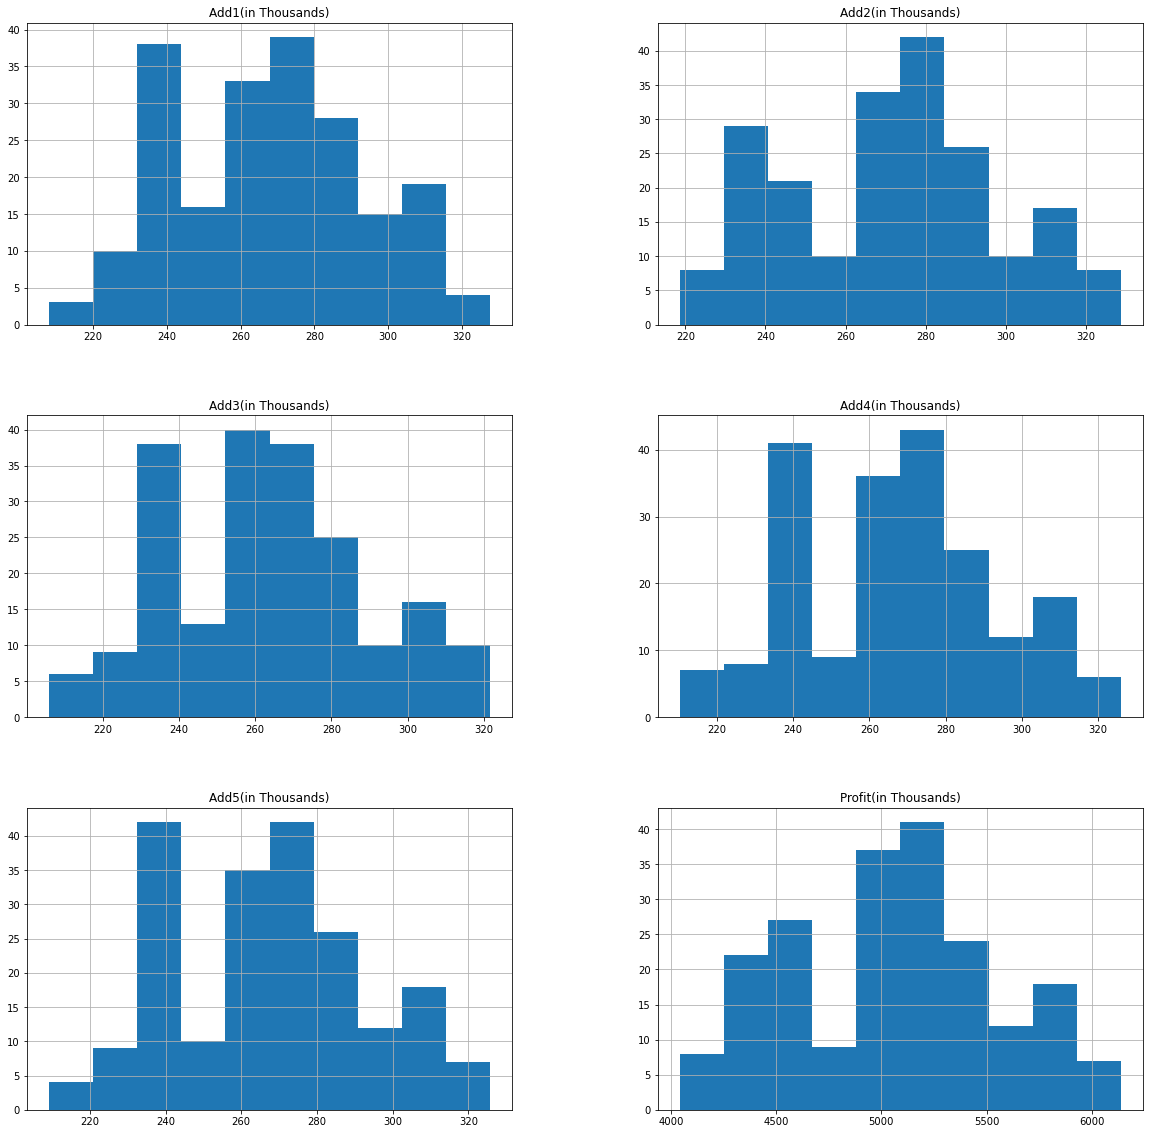

In [271]:
pr = data1.select_dtypes(include = ['float'])
pr.hist(figsize=(20,20))
plt.show()

# 1. check whether there is any relationship between the amount spent for advertising through five different companies and profit generated

<AxesSubplot:>

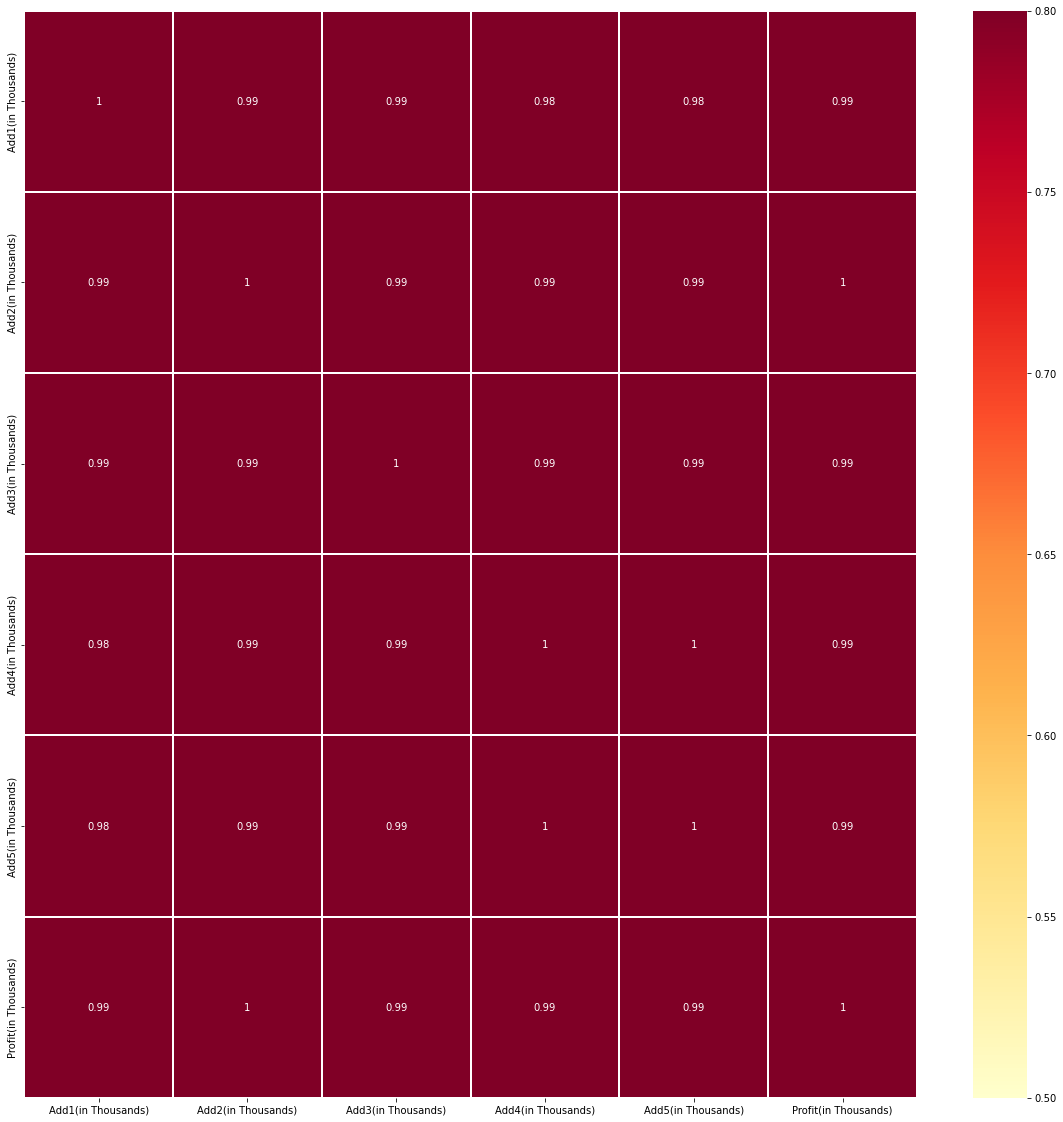

In [272]:
corrmatrix=data1.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmatrix, vmin=.5, vmax=.8, annot=True, linewidths= .2, cmap='YlOrRd')

The advertisements has a high positive relation with the profit. of which some has cent percent positive relation.and none is below .98 so the influnce of advertisemnts in generating profit is very high.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it

In [252]:
data2 = data1.drop(['Date','Add5(in Thousands)'],axis=1)

Dropping column "Add5(in Thousands)" gives minimum MSE value than keeping all columns or droping any other colums or combunation of columns.

<AxesSubplot:>

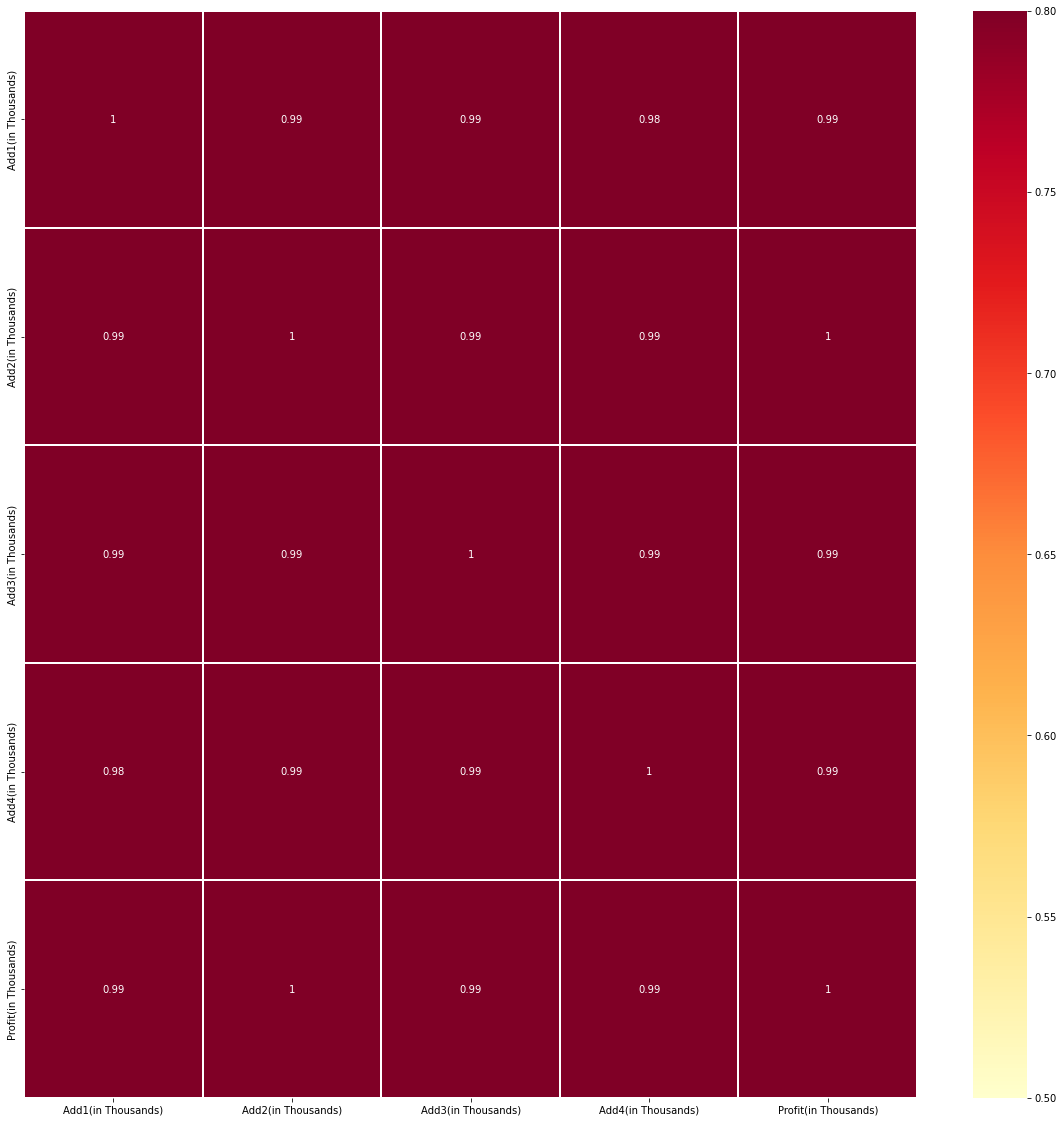

In [253]:
corrmatrix=data2.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmatrix, vmin=.5, vmax=.8, annot=True, linewidths= .2, cmap='YlOrRd')

In [254]:
y = data2['Profit(in Thousands)']
x= data2.drop(['Profit(in Thousands)'],axis=1)

In [255]:
x.shape

(205, 4)

In [256]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3, test_size=.25)

In [257]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [258]:
model = lr.fit(x_train, y_train)

In [259]:
prediction = model.predict(x_test)

In [260]:
from sklearn.metrics import mean_squared_error
print ('MSE is :', mean_squared_error(y_test, prediction))

MSE is : 0.2482676523348224


# Insights

Dropping column "Add5(in Thousands)" gives minimum MSE value than keeping all columns or droping any other colums or combunation of columns.

MSE is lower for the above combination.The value also change for different random state.


This clearly suggest that the influence of advertisement five can be neglected.Also when inclided it is incresing the MSE value.

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [261]:
data2.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Profit(in Thousands)
0,208.00,222.25,206.85,216.00,4093.065
1,217.00,218.60,205.90,210.25,4042.448
2,223.50,227.80,216.15,217.25,4213.819
3,230.00,237.50,225.75,226.45,4391.665
4,234.55,234.60,221.05,230.30,4350.683


In [262]:
make_pred=[[290,312,309,298]]
model.predict(make_pred).item()

5802.076752943092

The profit generated by the company for the given cost on advertisement is 5802.076752943092 thousands.